In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import scipy as sp

pd.set_option('max_rows', 400)
pd.set_option('max_columns', 400)
pd.set_option('max_colwidth', 500)
%matplotlib inline

In [2]:
data_dir = Path('../data')


# Make value luts

In [3]:
def make_lut(field, int_keys=True):
    lut = {}
    for ff in field.split('|'):
        code = ff.split(', ')[0]
        val = ff.replace(f'{code}, ', '').strip()
        if int_keys:
            lut[int(code)] = val
        else:
            lut[code.strip().lower()] = val
    return lut

defs_path = data_dir / 'CRISISAdultSelfReportBaselineP_DataDictionary_2020-04-18.csv'
defs = pd.read_csv(defs_path)

names_vals = defs.loc[defs['Choices, Calculations, OR Slider Labels'].notnull(),
                     ['Variable / Field Name', 'Choices, Calculations, OR Slider Labels']]

luts = {}
for ix, row in names_vals.iterrows():
    luts[row['Variable / Field Name']] = make_lut(row['Choices, Calculations, OR Slider Labels'])

In [4]:
luts['country']

{1: 'Afghanistan',
 2: 'Albania',
 3: 'Algeria',
 4: 'Andorra',
 5: 'Angola',
 6: 'Antigua and Barbuda',
 7: 'Argentina',
 8: 'Armenia',
 9: 'Australia',
 10: 'Austria',
 11: 'Azerbaijan',
 12: 'Bahamas',
 13: 'Bahrain',
 14: 'Bangladesh',
 15: 'Barbados',
 16: 'Belarus',
 17: 'Belgium',
 18: 'Belize',
 19: 'Benin',
 20: 'Bhutan',
 21: 'Bolivia',
 22: 'Bosnia and Herzegovina',
 23: 'Botswana',
 24: 'Brazil',
 25: 'Brunei',
 26: 'Bulgaria',
 27: 'Burkina Faso',
 28: 'Burundi',
 29: "Côte d'Ivoire",
 30: 'Cabo Verde',
 31: 'Cambodia',
 32: 'Cameroon',
 33: 'Canada',
 34: 'Central African Republic',
 35: 'Chad',
 36: 'Chile',
 37: 'China',
 38: 'Colombia',
 39: 'Comoros',
 40: 'Congo (Congo-Brazzaville)',
 41: 'Costa Rica',
 42: 'Croatia',
 43: 'Cuba',
 44: 'Cyprus',
 45: 'Czechia (Czech Republic)',
 46: 'Democratic Republic of the Congo',
 47: 'Denmark',
 48: 'Djibouti',
 49: 'Dominica',
 50: 'Dominican Republic',
 51: 'Ecuador',
 52: 'Egypt',
 53: 'El Salvador',
 54: 'Equatorial Guinea'

In [5]:
parent_race_field = "1, England, Ireland, Scotland or Wales | 2, Australia - not of Aboriginal or Torres Strait Islander descent | 3, Australia - of Aboriginal or Torres Strait Islander descent | 4, New Zealand - not of Maori descent | 5, New Zealand - of Maori descent | 6, Northern Europe including Sweden, Norway, Finland and surrounding countries | 7, Western Europe including France, Germany, the Netherlands and surrounding countries | 8, Southern Europe including Italy, Greece, Spain, Portugal and surrounding countries | 9, Eastern Europe including Russia, Poland, Hungary and surrounding countries | 10, Middle East including Lebanon, Turkey and surrounding countries | 11, Eastern Asia including China, Japan, South Korea, North Korea, Taiwan and Hong Kong | 12, South-East Asia including Thailand, Malaysia, Indonesia, Singapore and surrounding countries | 13, South Asia including India, Pakistan, Sri Lanka and surrounding countries | 14, Polynesia, Micronesia or Melanesia including Tonga, Fiji, Papua New Guinea and surrounding countries | 15, Africa | 16, North America - not of First Nations, Native American, Inuit or Métis descent | 17, North America - of First Nations, Native American, Inuit or Métis descent | Caribbean, Central or South America | 18, Don't know | 19, Other"
luts['parent_race'] = make_lut(parent_race_field, int_keys = False)
luts['parent_race'].pop('caribbean')
luts['parent_race']['caribbean'] = 'Caribbean, Central or South America'

In [6]:
"""{1: 'England, Ireland, Scotland or Wales',
 2: 'Australia - not of Aboriginal or Torres Strait Islander descent',
 3: 'Australia - of Aboriginal or Torres Strait Islander descent',
 4: 'New Zealand - not of Maori descent',
 5: 'New Zealand - of Maori descent',
 6: 'Northern Europe including Sweden, Norway, Finland and surrounding countries',
 7: 'Western Europe including France, Germany, the Netherlands and surrounding countries',
 8: 'Eastern Europe including Russia, Poland, Hungary and surrounding countries',
 9: 'Southern Europe including Italy, Greece, Spain, Portugal and surrounding countries',
 10: 'Middle East including Lebanon, Turkey and surrounding countries',
 11: 'Eastern Asia including China, Japan, South Korea, North Korea, Taiwan and Hong Kong',
 12: 'South-East Asia including Thailand, Malaysia, Indonesia, Singapore and surrounding countries',
 13: 'South Asia including India, Pakistan, Sri Lanka and surrounding countries',
 14: 'Polynesia, Micronesia or Melanesia including Tonga, Fiji, Papua New Guinea and surrounding countries',
 15: 'Africa',
 16: 'North America - not of First Nations, Native American, Inuit or Métis descent',
 17: 'North America - of First Nations, Native American, Inuit or Métis descent',
 18: 'Caribbean, Central or South America',
 19: "Don't know",
 20: 'Other'}"""

us_ances_lut =   {1: 'White',
                 2: 'White',
                 3: 'Other',
                 4: 'White',
                 5: 'Other',
                 6: 'White', 
                 7: 'White', 
                 8: 'White', 
                 9: 'White', 
                 10: 'Middle Eastern',
                 11: 'South-East Asian',
                 12: 'South-East Asian', 
                 13: 'South Asian', 
                 14: 'Other', 
                 15: 'Africa', 
                 16: 'White', 
                 17: 'North American', 
                 18: 'Caribbean, Central or South America',
                 19: "Don't Know", 
                 20: 'Other'}

uk_ances_lut =   {1: 'British',
                 2: 'White',
                 3: 'Other',
                 4: 'White',
                 5: 'Other',
                 6: 'White', 
                 7: 'White', 
                 8: 'White', 
                 9: 'White', 
                 10: 'Middle Eastern',
                 11: 'South-East Asian',
                 12: 'South-East Asian', 
                 13: 'South Asian', 
                 14: 'Other', 
                 15: 'Africa', 
                 16: 'White', 
                 17: 'North American', 
                 18: 'Caribbean, Central or South America',
                 19: "Don't Know", 
                 20: 'Other'}
pa_ances_lut = {1: 'White',
                 2: 'White',
                 3: 'Other',
                 4: 'White',
                 5: 'Other',
                 6: 'White', 
                 7: 'White', 
                 8: 'White', 
                 9: 'White', 
                 10: 'Asian',
                 11: 'Asian',
                 12: 'Asian', 
                 13: 'Asian', 
                 14: 'Other', 
                 15: 'Black', 
                 16: 'White', 
                 17: 'Other', 
                 18: 'White',
                 19: 'Other', 
                 20: 'Other'}
ances_luts = {'US':us_ances_lut, 'UK':uk_ances_lut, 'PA':pa_ances_lut}

In [7]:
def make_ances_col(df, alut, lut_name='race_cat'):
    df = df.copy()
    cats = np.unique(list(alut.values()))
    reverse_lut = {aa:[] for aa in cats}
    for k, v in alut.items():
        for aa in cats:
            if v == aa:
                reverse_lut[aa].append(f'raceethnicity___{k}')
    for aa in cats:
        df[aa] = df.loc[:, reverse_lut[aa]].sum(1) >=1
    df['Mixed'] = df.loc[:, cats].sum(1) > 1
    df.loc[df.Mixed, cats] = False

    df['no_race'] = False
    df.loc[df.loc[:, cats].sum(1) == 0, 'no_race'] = True

    df['race_cat'] = 'no_race'
    for aa in cats:
        df.loc[df[aa], lut_name] = aa
    df.loc[df.Mixed] ='Mixed' 
    return df[lut_name]

# Get demographic dists for each form

In [8]:
usadult_path = data_dir / 'Adult_US.csv'
usparent_path = data_dir / 'Parent_US.csv'
ukadult_path = data_dir / 'Adult_UK.csv'
uktrt_path = data_dir / 'Adult_UK_RT.csv'
ukparent_path = data_dir / 'Parent_UK.csv'

In [9]:
usa = pd.read_csv(usadult_path)
usa['sample_country'] = 'US'
usa['source_file'] = usadult_path.parts[-1]
usa = usa.rename(columns={'Sample': 'sample'})

usp = pd.read_csv(usparent_path)
usp['sample_country'] = 'US'
usp['source_file'] = usparent_path.parts[-1]

uka = pd.read_csv(ukadult_path)
uka['sample_country'] = 'UK'
uka['source_file'] = ukadult_path.parts[-1]

ukp = pd.read_csv(ukparent_path)
ukp['sample_country'] = 'UK'
ukp['source_file'] = ukparent_path.parts[-1]

ukr = pd.read_csv(uktrt_path)
ukr['sample_country'] = 'UK'
ukr['source_file'] = uktrt_path.parts[-1]

adat = pd.concat([usa, uka, ukr], sort=False, ignore_index=True)
pdat = pd.concat([usp, ukp], sort=False, ignore_index=True)
# Fix the race columns in the parent data
pdat['raceethnicity___20'] = pdat.raceethnicity___19
pdat['raceethnicity___19'] = pdat.raceethnicity___18
pdat['raceethnicity___18'] = pdat.raceethnicity___caribbean
pdat = pdat.drop('raceethnicity___caribbean', axis=1)

In [10]:
# Deal with age_cat then we can merge
adat['age_cat'] = 'no_age'
adat.loc[adat.years < 18, 'age_cat'] = '< 18'
adat.loc[(adat.years >= 18) & (adat.years <= 27) , 'age_cat'] = '18-27'
adat.loc[(adat.years >= 28) & (adat.years <= 37) , 'age_cat'] = '28-37'
adat.loc[(adat.years >= 38) & (adat.years <= 47) , 'age_cat'] = '38-47'
adat.loc[(adat.years >= 48) & (adat.years <= 57) , 'age_cat'] = '48-57'
adat.loc[(adat.years >= 58), 'age_cat'] = '58+'

pdat['age_cat'] = 'no_age'
pdat.loc[pdat.years_2 <= 5, 'age_cat'] = '<= 5'
pdat.loc[(pdat.years_2 >= 6) & (pdat.years_2 <= 10) , 'age_cat'] = '6-10'
pdat.loc[(pdat.years_2 >= 11) & (pdat.years_2 <= 15) , 'age_cat'] = '11-15'
pdat.loc[(pdat.years_2 >= 15), 'age_cat'] = '15+'

In [11]:
# Merge parent and adult
dat = pd.concat([adat, pdat], sort=False, ignore_index=True)
assert dat.index.nunique() == len(dat)
dat = dat.reset_index()
dat['uid'] = dat.participant_id+dat['index'].apply(lambda x: f'_{x:05d}')
dat = dat.drop('index', axis=1)
dat['country_name'] = dat.loc[dat.country.notnull(), 'country'].apply(lambda x: luts['country'][x])
dat.loc[dat.country_name == 'United States of America', 'country_name'] = 'US'
dat.loc[dat.timestamp1.isnull(), 'timestamp1'] = dat.loc[dat.timestamp1.isnull(), 'timestamp2']

In [12]:
# make sex category
dat['sex_cat'] = 'no_sex'
dat.loc[dat.sex == 1, 'sex_cat'] = 'Male'
dat.loc[dat.sex == 2, 'sex_cat'] = 'Female'
dat.loc[dat.sex == 3, 'sex_cat'] = 'Other'

# Make race category
dat['race_cat'] = np.nan
dat.loc[dat.sample_country == 'US', 'race_cat'] = make_ances_col(dat.loc[dat.sample_country == 'US'], us_ances_lut)
dat.loc[dat.sample_country == 'UK', 'race_cat'] = make_ances_col(dat.loc[dat.sample_country == 'UK'], uk_ances_lut)
dat['PA_race_cat'] = make_ances_col(dat, pa_ances_lut)

In [13]:
samp_counts = (dat.groupby('sample')[['participant_id']]
               .count()
               .rename(columns={'participant_id': 'sample_n'})
               .reset_index())

In [14]:
sex_nums = (dat.groupby(['sample', 'sex_cat'])[['participant_id']]
            .count()
            .rename(columns={'participant_id': 'cat_n'})
            .reset_index()
            .merge(samp_counts, how='left', on='sample'))
sex_nums['cat_prop'] = sex_nums.cat_n / sex_nums.sample_n

In [15]:
age_nums = (dat.groupby(['sample', 'age_cat'])[['participant_id']]
            .count()
            .rename(columns={'participant_id': 'cat_n'})
            .reset_index()
            .merge(samp_counts, how='left', on='sample'))
age_nums['cat_prop'] = age_nums.cat_n / age_nums.sample_n

In [16]:
race_nums = (dat.groupby(['sample', 'race_cat'])[['participant_id']]
            .count()
            .rename(columns={'participant_id': 'cat_n'})
            .reset_index()
            .merge(samp_counts, how='left', on='sample'))
race_nums['cat_prop'] = race_nums.cat_n / race_nums.sample_n

In [17]:
race_nums.loc[:, ['sample', 'sample_n', 'race_cat', 'cat_n', 'cat_prop']].sort_values(['sample', 'cat_n'], ascending=[True, False]).to_csv(data_dir/'race_breakdown.csv', index=None)

# Make exclude column

In [18]:
dat['sample'].unique()

array(['Adult_US', 'Adult_US_CA', 'Adult_US_NY', 'Adult_US_RT',
       'Adult_London', 'Adult_Manchester', 'Adult_UK', 'Adult_UK_RT',
       'Parent_US', 'Parent_US_RT', 'Parent_US_CA', 'Parent_US_NY',
       'Parent_UK', 'Parent_UK_London', 'Parent_UK_Manchester',
       'Parent_UK_RT'], dtype=object)

In [19]:
adult_samples = ['Adult_US', 'Adult_US_CA', 'Adult_US_NY', 'Adult_US_RT',
                 'Adult_London', 'Adult_Manchester', 'Adult_UK', 'Adult_UK_RT']
parent_samples = ['Parent_US', 'Parent_US_RT', 'Parent_US_CA', 'Parent_US_NY',
                  'Parent_UK', 'Parent_UK_London', 'Parent_UK_Manchester',
                  'Parent_UK_RT']
rt_samples = ["Adult_US_RT", "Adult_UK_RT", 'Parent_US_RT', 'Parent_UK_RT']

In [20]:
adat = dat.loc[dat['sample'].isin(adult_samples)]
pdat = dat.loc[dat['sample'].isin(parent_samples)]

In [21]:
artdat = adat.loc[adat['sample'].isin(rt_samples) & (adat.adult_selfreport_baseline_form_complete == 2), :]
asdat = adat.loc[~adat['sample'].isin(rt_samples) & (adat.adult_selfreport_baseline_form_complete == 2), :]
prtdat = pdat.loc[pdat['sample'].isin(rt_samples) & (pdat.parentcaregiver_baseline_form_complete == 2), :]
psdat = pdat.loc[~pdat['sample'].isin(rt_samples) & (pdat.parentcaregiver_baseline_form_complete == 2), :]

# There are duplicated participant IDS
# Some duplications are ok (Parent + Adult), potentially parent + parent if they have more than one kid
# First we'll split out adult sample and look for duplications there
multi_sample_ids = asdat.groupby("participant_id")[['sample']].count().sort_values('sample', ascending=False).reset_index().query("sample > 1").participant_id
# display(asdat.groupby("participant_id")[['sample']].count().sort_values('sample', ascending=False).reset_index().groupby("sample").count())


dups = []
for id,df in asdat.loc[asdat.participant_id.isin(multi_sample_ids), :].groupby('participant_id'):
    dups.append(', '.join(list(sorted(df['sample'].values))))
    
samples, counts = np.unique(dups, return_counts=True)

dup_table = pd.DataFrame()
dup_table['samples'] = samples
dup_table['counts'] = counts
display(dup_table.sort_values('counts', ascending=False))

field_difs = []
for id,df in asdat.loc[asdat.participant_id.isin(multi_sample_ids), :].groupby('participant_id'):
    uniques = df.nunique()
    uniques = pd.DataFrame(uniques[uniques > 1], columns=['n_unique_vals'])
    uniques = uniques.drop(['uid', 'sample', 'timestamp1', 'timestamp2'], errors = 'ignore')
    if len(uniques) == 0:
        continue
    uniques = uniques.T
    uniques['participant_id'] = id
    field_difs.append(uniques)
dif_resp_ids = pd.concat(field_difs, ignore_index=True, sort=False).participant_id

# display(asdat.query('participant_id.isin(@dif_resp_ids)').sort_values('participant_id'))

ps_multi_sample_ids = psdat.groupby("participant_id")[['sample']].count().sort_values('sample', ascending=False).reset_index().query("sample > 1").participant_id
#psdat.groupby("participant_id")[['sample']].count().sort_values('sample', ascending=False).reset_index().groupby("sample").count()
# print("parent report data")
# display(psdat.loc[psdat.participant_id.isin(ps_multi_sample_ids), :].sort_values('participant_id'))

# psdat.loc[psdat.participant_id.isin(ps_multi_sample_ids), :].sort_values('participant_id').uid

,samples,counts
13,"Adult_US_CA, Adult_US_NY",20
1,"Adult_London, Adult_UK",15
12,"Adult_US_CA, Adult_US_CA, Adult_US_NY, Adult_US_NY",11
0,"Adult_London, Adult_London",5
4,"Adult_US, Adult_US",4
5,"Adult_US, Adult_US, Adult_US, Adult_US",4
7,"Adult_US, Adult_US, Adult_US_NY, Adult_US_NY",3
11,"Adult_US, Adult_US_NY",3
8,"Adult_US, Adult_US_CA",2
2,"Adult_London, Adult_UK, Adult_UK",1


In [22]:
adult_duped_ids = multi_sample_ids[~multi_sample_ids.isin(dif_resp_ids)]

In [23]:
dupe_pick_ind =  (dat.participant_id.isin(adult_duped_ids)
                 & (dat.adult_selfreport_baseline_form_complete != 0)
                 & (dat.parentcaregiver_baseline_form_complete != 0))
keep_resps = dat.loc[dupe_pick_ind, :].sort_values('timestamp1').groupby('participant_id').first().uid

In [24]:
dif_resp_ids

0     59d65d404f19050001763c39
1     5abc50b2f69e940001d92a87
2     5b7ba81916aa44000169aa2f
3     5b9c270f12dc2f0001ac933e
4     5c6d460ec3aa150001145611
5     5c6f9453cbd1430001a04463
6     5d4c4fadb2adbc0001fcbcfc
7     5d58557e7e527000158ec316
8     5d8312e5d1893500011f80ba
9     5da6c887897c0e0014528d3b
10    5dd66c10f83c9f5ef3a7bc0b
11    5e0857276aab7c17f7e21662
12    5e3f7b63badc6c1db1be6647
13    5e4c2ab748843608239fd84d
14    5e5d04c154c9ac000bf350bd
15    5e64393b2a0d161c7c02126c
16    5e83e82e30500a14da61c864
17    5e8480f48e665402a4109dfd
18    5e87f838e770eb481802a443
19    5e89ad187ad752640e558c8a
20    5e90c2a79422bb3f36472444
Name: participant_id, dtype: object

In [25]:
dat['exclude'] = False
exclude_ind = ((dat.participant_id.isin(dif_resp_ids) & dat['sample'].isin(['Adult_US', 'Adult_US_CA', 'Adult_US_NY','Adult_London', 'Adult_Manchester', 'Adult_UK']))
               | (dat.adult_selfreport_baseline_form_complete == 0)
               | (dat.parentcaregiver_baseline_form_complete == 0)
               | (dat.participant_id.isin(adult_duped_ids) & ~dat.uid.isin(keep_resps))
               # Second entry about the same kid, keeping the first, which is 5a49d6a06d85f80001c25bc4_03615
               | (dat.uid == '5a49d6a06d85f80001c25bc4_03614')
              )
dat.loc[exclude_ind, 'exclude'] = True

# Exclude all instances of test-retest subjects outside the test retest data
rt_dat = dat.loc[dat['sample'].isin(rt_samples), 'participant_id']
dat.loc[dat.participant_id.isin(rt_dat) & ~dat['sample'].isin(rt_samples), 'exclude'] = True

dat['form'] = np.nan
dat.loc[dat['sample'].isin(adult_samples), 'form'] = 'adult'
dat.loc[dat['sample'].isin(parent_samples), 'form'] = 'parent'

In [26]:
print(((dat.participant_id.isin(dif_resp_ids)) & dat['sample'].isin(['Adult_US', 'Adult_US_CA', 'Adult_US_NY','Adult_London', 'Adult_Manchester', 'Adult_UK'])).sum())
print((dat.adult_selfreport_baseline_form_complete == 0).sum())
print((dat.parentcaregiver_baseline_form_complete == 0).sum())
print((dat.participant_id.isin(adult_duped_ids) & ~dat.uid.isin(keep_resps)).sum())
print((dat.participant_id.isin(rt_dat) & ~dat['sample'].isin(rt_samples)).sum())

84
151
131
75
26


In [27]:
# Exclude all instances of test-retest subjects outside the test retest data
rt_dat = dat.loc[dat['sample'].isin(rt_samples), 'participant_id']
dat.loc[dat.participant_id.isin(rt_dat) & ~dat['sample'].isin(rt_samples), 'exclude'] = True

In [28]:
dat['form'] = np.nan
dat.loc[dat['sample'].isin(adult_samples), 'form'] = 'adult'
dat.loc[dat['sample'].isin(parent_samples), 'form'] = 'parent'

In [29]:
# Make sure that we've really deduped the samples
assert len(dat.loc[(~dat.exclude) & (~dat['sample'].isin(rt_samples)), :].groupby(['form', 'participant_id'])[['sample']].count().reset_index().query('sample > 1')) == 0

## merge in Diana's exclusion rules
Also create a hash_dup_id column that's based on a hash of the data

In [30]:
tmp_dat = dat.copy(deep=True)

dex_data = pd.read_csv(data_dir / 'data_with_exclusions_from_Diana.csv')

# Fix some issues in the data
trucated_cols = {'adult_selfreport_baseline_form_c': 'adult_selfreport_baseline_form_complete',
                 'parentcaregiver_baseline_form_co': 'parentcaregiver_baseline_form_complete'}
dex_data = dex_data.rename(columns=trucated_cols)

pind = dex_data.raceethnicity___20.isnull() & dex_data.raceethnicity___caribbean.notnull() 
dex_data.loc[pind, 'raceethnicity___20'] = dex_data.loc[pind, 'raceethnicity___19']
dex_data.loc[pind, 'raceethnicity___19'] = dex_data.loc[pind, 'raceethnicity___18']
dex_data.loc[pind, 'raceethnicity___18'] = dex_data.loc[pind, 'raceethnicity___caribbean']

# Stata screws up float representations due to flointing point
dex_data['tall'] = np.round(dex_data.tall, 2)
dex_data['weight'] = np.round(dex_data.weight, 2)
tmp_dat['tall'] = np.round(tmp_dat.tall, 2)
tmp_dat['weight'] = np.round(tmp_dat.weight, 2)

# There's one case with a missing first timestamp where I loaded it from timestamp2
dex_data.loc[dex_data.timestamp1.isnull(), 'timestamp1'] = dex_data.loc[dex_data.timestamp1.isnull(), 'timestamp2']

md5_cols = ['participant_id',
'sample',
'timestamp1',
'country',
'stateetc',
'county',
'city',
'years',
'sex',
'sex_other',
'raceethnicity___1',
'raceethnicity___2',
'raceethnicity___3',
'raceethnicity___4',
'raceethnicity___5',
'raceethnicity___6',
'raceethnicity___7',
'raceethnicity___8',
'raceethnicity___9',
'raceethnicity___10',
'raceethnicity___11',
'raceethnicity___12',
'raceethnicity___13',
'raceethnicity___14',
'raceethnicity___15',
'raceethnicity___16',
'raceethnicity___17',
'raceethnicity___18',
'raceethnicity___19',
'raceethnicity___20',
'hispanic',
'working___1',
'working___2',
'working___3',
'working___4',
'working___5',
'working___6',
'working___7',
'working___8',
'occupation',
'military',
'location',
'education',
'educationmother',
'educationfather',
'householdnumber',
'essentialworkers',
'essentialworkerhome',
'covidfacility',
'householdcomp___1',
'householdcomp___2',
'householdcomp___3',
'householdcomp___4',
'householdcomp___5',
'householdcomp___6',
'householdcomp___7',
'roomsinhouse',
'insurance',
'govassist',
'physicalhealth',
'healthconditions___1',
'healthconditions___2',
'healthconditions___3',
'healthconditions___4',
'healthconditions___5',
'healthconditions___6',
'healthconditions___7',
'healthconditions___8',
'healthconditions___9',
'healthconditions___10',
'healthconditions___11',
'healthconditions___12',
'healthconditions___13',
'healthconditions___14',
'healthconditions___15',
'healthconditions___16',
'healthconditions___17',
'tall',
'measurementheight',
'weight',
'measurementweight',
'mentalhealth',
'exposed___1',
'exposed___2',
'exposed___3',
'exposed___4',
'infected',
'symptoms___1',
'symptoms___2',
'symptoms___3',
'symptoms___4',
'symptoms___5',
'symptoms___6',
'symptoms___7',
'symptoms___8',
'othersymptoms',
'diagnosedfamily___1',
'diagnosedfamily___2',
'diagnosedfamily___3',
'impact___1',
'impact___2',
'impact___3',
'impact___4',
'impact___5',
'impact___6',
'impact___7',
'impact___8',
'worriedyourself',
'worriedothers',
'worriedphysical',
'worriedmental',
'readingtalking',
'positivechange',
'specifypositive',
'schoolclosed',
'classesinsession',
'classesirl',
'onlineclasses',
'internetcompacess',
'assignments',
'mealsfromschool',
'work',
'goingtoworkplace',
'workfromhome',
'laidoff',
'losejob',
'inpersonconvo',
'timeoutside',
'restrictionsstress',
'contactschanged',
'difficultydistancing',
'familychange',
'familychangestress',
'friendschange',
'friendchangestress',
'difficultycancellations',
'financedifficulty',
'livingdifficulty',
'foodsecurity',
'hopefullyend',
'bedtimeweekdays',
'bedtimeweekends',
'hoursofsleepweekdays',
'hoursofsleepweekends',
'exerciseprior',
'outdoorsprior',
'priorworry',
'priorhappyvssad',
'priorenjoyactivities',
'priorrelaxedvsanxious',
'priorfidget',
'priorfatigue',
'priorfocus',
'priorirritable',
'priorlonely',
'priornegthoughts',
'priortvmedia',
'priorsocialmedia',
'priorvideogames',
'threemonthsalcohol',
'threemonthsvaping',
'threemonthstobacco',
'threemonthsmarijuana',
'threemonthsopiates',
'threemonthsother',
'threemonthssleepingmeds',
'bedtimeweekdays_2',
'bedtimeweekends_2',
'hoursofsleepweekdays_2',
'hoursofsleepweekends_2',
'exerciseprior_2',
'outdoorsprior_2',
'priorworry_2',
'priorhappyvssad_2',
'priorenjoyactivities_2',
'priorrelaxedvsanxious_2',
'priorfidget_2',
'priorfatigue_2',
'priorfocus_2',
'priorirritable_2',
'priorlonely_2',
'priornegthoughts_2',
'priortvmedia_2',
'priorsocialmedia_2',
'priorvideogames_2',
'twoweeksalcohol',
'twoweeksvaping',
'twoweekstobacco',
'twoweeksmarijuana',
'twoweeksopiates',
'twoweeksother',
'twoweeksleeping',
'disruptedsupports___1',
'disruptedsupports___2',
'disruptedsupports___3',
'disruptedsupports___4',
'disruptedsupports___5',
'disruptedsupports___6',
'disruptedsupports___7',
'disruptedsupports___8',
'disruptedsupports___9',
'disruptedsupports___10',
'disruptedsupports___11',
'disruptedsupports___12',
'disruptedsupports___13',
'disruptedsupportsother',
'anything_else',
'timestamp2',
'adult_selfreport_baseline_form_complete',
'years_2',
'caregiverrelation',
'othercaregiverrelation',
'school___1',
'school___2',
'school___3',
'school___4',
'school___5',
'school___6',
'parenteducation',
'secondparenteducation',
'priorweekdaybedtime',
'priorweekendbedtime',
'priorhoursofsleepweekdays',
'priorhoursofsleepweekend',
'priorweekdaybedtime_2',
'priorweekendbedtime_2',
'parentcaregiver_baseline_form_complete']
md5_cols = pd.Series(md5_cols)

dex_data['hash'] = dex_data.loc[:, md5_cols].apply(lambda x: hash(tuple(x)), axis=1)
tmp_dat['hash'] = tmp_dat.loc[:, md5_cols].apply(lambda x: hash(tuple(x)), axis=1)

assert (~tmp_dat.hash.isin(dex_data.hash)).sum() == 0
# These are useful if this assert fails:
# dat[~dat.hash.isin(dex_data.hash)]
# pid = '5aeb6f1e23e2ca0001974556'
# mismatches = dat.loc[dat.participant_id == pid, md5_cols].reset_index(drop=True) == dex_data.loc[dex_data.participant_id == pid, md5_cols].reset_index(drop=True)
# dat.loc[dat.participant_id == pid, mismatches.loc[:, ~mismatches.loc[0]].columns]
# dex_data.loc[dex_data.participant_id == pid, mismatches.loc[:, ~mismatches.loc[0]].columns]

dex_data['dup_id'] = dex_data.groupby('hash').hash.apply(lambda x: np.argsort(x))
dex_data['hash_dup_id'] = dex_data.hash.astype(str) + '_' + dex_data.dup_id.astype(str)

tmp_dat['dup_id'] = tmp_dat.groupby('hash').hash.apply(lambda x: np.argsort(x))
tmp_dat['hash_dup_id'] = tmp_dat.hash.astype(str) + '_' + tmp_dat.dup_id.astype(str)

dex_merge = dex_data.loc[:, ['hash_dup_id', 'regsam','retest','duptag','dupsel']]

td_len = len(tmp_dat)
tmp_dat = tmp_dat.merge(dex_merge, on='hash_dup_id', how='left', indicator=True)
assert tmp_dat.groupby('_merge').participant_id.count()['left_only'] == 0
assert tmp_dat.groupby('_merge').participant_id.count()['right_only'] == 0
tmp_dat = tmp_dat.drop('_merge', axis=1)

assert td_len == len(tmp_dat)

dat = dat.merge(tmp_dat.loc[:, ['uid', 'hash_dup_id', 'regsam','retest', 'duptag', 'dupsel']], on='uid', how='left')


In [31]:
dex_data = dex_data.merge(tmp_dat.loc[:, ['hash_dup_id', 'uid']], on='hash_dup_id')
dex_data.to_csv(data_dir / 'data_with_exclusions_from_Diana_with_uid.csv', index=None)

# Pick hold out sample

In [32]:
# load data that has already been explored to make sure that they are not in the hold out
xp_dat = pd.read_csv(data_dir / 'exploratory_sample.csv')

In [33]:
holdout_ind = (~dat.exclude) & (~dat.participant_id.isin(rt_dat)) & (~dat.participant_id.isin(xp_dat.participant_id))

In [34]:
dat['hispanic_cat'] = dat.hispanic.fillna('no_response')

In [35]:
holdout_ns = (dat.loc[holdout_ind, :]
              .groupby(['sample', 'sex_cat', 'age_cat', 'race_cat', 'hispanic_cat'])[['participant_id']].count())
# We've already excluded 1/6 because they're exploratory, so 2/5 of the remaining 5/6 is 1/3
holdout_ns *= 2/5
holdout_ns = holdout_ns.rename(columns={'participant_id': 'ho_n_prob'}).reset_index()
holdout_ns['cutoff'] = holdout_ns.ho_n_prob % 1
np.random.seed(0)
holdout_ns['roll'] = np.random.uniform(size=len(holdout_ns))
holdout_ns['ho_n'] = np.floor(holdout_ns.ho_n_prob)
holdout_ns.loc[(holdout_ns.roll <= holdout_ns.cutoff), 'ho_n'] += 1

In [36]:
holdout_ns = holdout_ns.loc[~holdout_ns['sample'].isin(rt_samples), :]
holdout_ns = holdout_ns.loc[holdout_ns['ho_n'] > 0, :]

In [37]:
heldout_ids = []
for ix, row in holdout_ns.iterrows():
    ind = ((dat['sample'] == row['sample'])
           & (dat.sex_cat == row.sex_cat)
           & (dat.age_cat == row.age_cat)
           & (dat.race_cat == row.race_cat)
           & (dat.hispanic_cat == row.hispanic_cat)
           & (~dat.exclude)
           & (~dat.participant_id.isin(rt_dat))
           & (~dat.participant_id.isin(xp_dat.participant_id)))
    heldout_ids.extend(dat.loc[ind, 'participant_id'].sample(n = int(row.ho_n), random_state=0).values)
    

# mark first complete response from test-retest sample include

In [38]:
# Get first response on each form from folks in test-retest sample without violating other exclude rules
complete_rt_ind = (dat.participant_id.isin(rt_dat)
                   & (dat.adult_selfreport_baseline_form_complete != 0)
                   & (dat.parentcaregiver_baseline_form_complete != 0)
                   & ~(dat.participant_id.isin(dif_resp_ids) & dat['sample'].isin(['Adult_US', 'Adult_US_CA', 'Adult_US_NY','Adult_London', 'Adult_Manchester', 'Adult_UK']))
                   & ~(dat.participant_id.isin(adult_duped_ids) & ~dat.uid.isin(keep_resps))
                   & ~(dat.uid == '5a49d6a06d85f80001c25bc4_03614'))

In [39]:
dat.loc[complete_rt_ind, 'sample'].unique()

array(['Adult_US', 'Adult_US_RT', 'Adult_Manchester', 'Adult_UK',
       'Adult_UK_RT', 'Parent_US_RT', 'Parent_US', 'Parent_US_CA',
       'Parent_UK', 'Parent_UK_Manchester', 'Parent_UK_RT'], dtype=object)

In [40]:
dat['date'] = pd.to_datetime(dat.timestamp1)

In [41]:
adult_first_rts = dat.loc[complete_rt_ind & (dat.form == 'adult'),:].sort_values('date').groupby('participant_id').first().uid
parent_first_rts = dat.loc[complete_rt_ind & (dat.form == 'parent'),:].sort_values('date').groupby('participant_id').first().uid
first_rts = pd.concat([adult_first_rts, parent_first_rts])

In [42]:
dat['sample_with_RT'] = dat['sample']
dat['exclude_with_RT'] = dat['exclude']
dat.loc[complete_rt_ind, 'exclude_with_RT'] = True
dat.loc[dat.uid.isin(first_rts), 'exclude_with_RT'] = False
dat.loc[dat.uid.isin(first_rts), 'sample_with_RT'] = (dat.loc[dat.uid.isin(first_rts), 'sample_with_RT']
                                                      .str.replace('_RT',''))
dat = dat.drop('date', axis = 1)

# Merge covid data for US sample

In [43]:
usdat = dat.loc[dat['sample'].str.contains('US'), :].copy()

In [44]:
# This data is coming from Johns hopkins data
# https://github.com/CSSEGISandData/COVID-19.git
jhu_us_case_path = data_dir / 'time_series_covid19_confirmed_US.csv'
jhu_us_case = pd.read_csv(jhu_us_case_path)

jhu_us_deaths_path= data_dir / 'time_series_covid19_deaths_US.csv'
jhu_us_deaths = pd.read_csv(jhu_us_deaths_path)

jhu_world_case_path = data_dir / 'time_series_covid19_confirmed_global.csv'
jhu_world_case = pd.read_csv(jhu_world_case_path)

jhu_world_deaths_path = data_dir / 'time_series_covid19_deaths_global.csv'
jhu_world_deaths = pd.read_csv(jhu_world_deaths_path)

# ansi_place_path = data_dir / 'ansi_places.csv'
# places = pd.read_csv(ansi_place_path, sep='|')
cfix = pd.read_excel(data_dir / 'county_fixin.xlsx', sheet_name='combined').reset_index(drop=True)
cfix = cfix.drop('Unnamed: 0', axis=1)
cfix = cfix.loc[cfix['fixed_county'].notnull(), :]
cfix.loc[cfix.county.notnull(),'county'] = cfix.loc[cfix.county.notnull(),'county'].astype(str)
assert len(cfix.loc[~cfix.fixed_county.str.lower().isin(jhu_us_case.Admin2.str.lower()), :]) == 0
sfix = pd.read_excel(data_dir / 'county_fixin.xlsx', sheet_name='state_fix')
sfix = sfix.loc[sfix['fixed_state'].notnull(), :].drop_duplicates()
sfix = sfix.drop('Unnamed: 0', axis=1)


In [45]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
us_state_abbrev_inv = {v:k for k,v in us_state_abbrev.items()}

In [46]:
usdat['county'] = usdat.county.str.lower()


In [47]:
county_drops = ['county', 'parish', 'municipio']
for cd in county_drops:
    usdat['county'] = usdat.county.str.replace(cd, '').str.strip()

In [48]:
no_county_ind = ~usdat.county.str.lower().isin(jhu_us_case.Admin2.str.lower())
long_state_ind = no_county_ind & usdat.stateetc.str.title().isin(us_state_abbrev.keys())
abrev_ind = no_county_ind & usdat.stateetc.isin(us_state_abbrev.values())

In [49]:
usdat['state_code'] = np.nan
usdat.loc[abrev_ind, 'state_code'] = usdat.loc[abrev_ind, 'stateetc']
usdat.loc[long_state_ind, 'state_code'] = usdat.loc[long_state_ind, 'stateetc'].apply(lambda x: us_state_abbrev[x.title()])


In [50]:
usdat['stateetc'] = usdat['stateetc'].str.strip()
usdat['city'] = usdat['city'].str.strip()

In [51]:
# usdat['county'] = usdat.county.fillna('missing value')
# usdat['stateetc'] = usdat.stateetc.fillna('missing value')
# usdat['city'] = usdat.city.fillna('missing value')

usdat['stateetc'] = usdat.stateetc.str.lower().str.strip()
usdat['county'] = usdat.county.str.lower().str.strip()
usdat['city'] = usdat.city.str.lower().str.strip()

In [52]:
# cfix['county'] = cfix.county.fillna('missing value')
# cfix['stateetc'] = cfix.stateetc.fillna('missing value')
# cfix['city'] = cfix.city.fillna('missing value')
cfix['stateetc'] = cfix.stateetc.str.lower().str.strip()
cfix['county'] = cfix.county.str.lower().str.strip()
cfix['city'] = cfix.city.str.lower().str.strip()

In [53]:
cfix = cfix.drop_duplicates(['stateetc', 'county', 'city'])

In [54]:
assert usdat.merge(cfix, how='left', on=['stateetc', 'county', 'city'], indicator=True).shape[0] == usdat.shape[0]
usdat = usdat.merge(cfix, how='left', on=['stateetc', 'county', 'city'])

In [55]:
usdat.loc[usdat.fixed_county.notnull(), 'county'] = usdat.loc[usdat.fixed_county.notnull(), 'fixed_county']

In [56]:
code_ind = usdat.stateetc.str.upper().isin(us_state_abbrev.values())

usdat.loc[code_ind, 'stateetc'] = usdat.loc[code_ind, 'stateetc'].apply(lambda x: us_state_abbrev_inv[x.upper()])

In [57]:
usdat['timestamp1'] = pd.to_datetime(usdat['timestamp1'] )
sfix['timestamp1'] = pd.to_datetime(sfix.timestamp1)
usdat['stateetc'] = usdat.stateetc.str.strip()
usdat['stateetc'] = usdat.stateetc.str.lower().str.strip()
usdat['county'] = usdat.county.str.lower().str.strip()
usdat['city'] = usdat.city.str.lower().str.strip()
sfix['stateetc'] = sfix.stateetc.str.lower().str.strip()
sfix['county'] = sfix.county.str.lower().str.strip()
sfix['city'] = sfix.city.str.lower().str.strip()
sfix = sfix.drop_duplicates(['stateetc', 'county', 'city'])

In [58]:
assert usdat.merge(sfix, how='left', on=["participant_id", "timestamp1", "stateetc", "county", "city"]).shape[0] == usdat.shape[0]
usdat = usdat.merge(sfix, how='left', on=["participant_id", "timestamp1", "stateetc", "county", "city"])

In [59]:
usdat.loc[usdat.fixed_state.notnull(), 'stateetc'] = usdat.loc[usdat.fixed_state.notnull(), 'fixed_state']

In [60]:
usdat['date'] = usdat.timestamp1.dt.date
usdat['stateetc'] = usdat.stateetc.str.lower().str.strip()
usdat['county'] = usdat.county.str.lower().str.strip()

assert usdat.merge(cfix, how='left', on=['stateetc', 'county', 'city'], indicator=True).shape[0] == usdat.shape[0]
usdat = usdat.merge(cfix, how='left', on=['stateetc', 'county', 'city'])
usdat.loc[usdat.fixed_county_y.notnull(), 'county'] = usdat.loc[usdat.fixed_county_y.notnull(), 'fixed_county_y']

In [61]:
usdat['date'] = usdat.timestamp1.dt.date
usdat['stateetc'] = usdat.stateetc.str.lower().str.strip()
usdat['county'] = usdat.county.str.lower().str.strip()
assert usdat.merge(sfix, how='left', on=['stateetc', 'county', 'city'], indicator=True).shape[0] == usdat.shape[0]
usdat = usdat.merge(sfix, how='left', on=['stateetc', 'county', 'city'], suffixes=['', '_y'])
usdat.loc[usdat.fixed_state_y.notnull(), 'stateetc'] = usdat.loc[usdat.fixed_state_y.notnull(), 'fixed_state_y']
usdat['date'] = usdat.timestamp1.dt.date
usdat['stateetc'] = usdat.stateetc.str.lower().str.strip()
usdat['county'] = usdat.county.str.lower().str.strip()

In [62]:
# Sadly, I need to fix some cities and counties that got merged
cc_fix = pd.read_csv(data_dir / 'county_cities.csv')

In [63]:
cc_fix['fixed_county'] = cc_fix.fixed_county.str.lower()
cc_fix['fixed_county'] = cc_fix.fixed_county.str.replace("county", "").str.strip()

In [64]:
for ix,row in cc_fix.iterrows():
    usdat.loc[usdat.uid == row.uid, 'county'] = row.fixed_county

In [65]:
jhu_us_case['Province_State'] = jhu_us_case.Province_State.str.lower()
jhu_us_case['Admin2'] = jhu_us_case.Admin2.str.lower()
jhu_us_case.loc[jhu_us_case.FIPS.notnull(), 'FIPS'] = jhu_us_case.loc[jhu_us_case.FIPS.notnull(), 'FIPS'].apply(lambda x: f'{int(x):05d}')
jhu_us_case.loc[jhu_us_case.FIPS.notnull(), 'stateFIPS'] = jhu_us_case.loc[jhu_us_case.FIPS.notnull(), 'FIPS'].str[:2]

jhu_us_deaths['Province_State'] = jhu_us_deaths.Province_State.str.lower()
jhu_us_deaths['Admin2'] = jhu_us_deaths.Admin2.str.lower()


In [66]:
date_cols = jhu_us_case.columns[jhu_us_case.columns.str.contains('/20')]
meta_cols = jhu_us_case.columns[~jhu_us_case.columns.str.contains('/20')]

In [67]:
jhu_us_new_case = jhu_us_case.copy()
jhu_us_new_case.loc[:, list(date_cols[1:])] = jhu_us_case.loc[:, date_cols[1:]].values - jhu_us_case.loc[:, date_cols[:-1]].values


In [68]:
jhu_us_new_deaths = jhu_us_deaths.copy()
jhu_us_new_deaths.loc[:, list(date_cols[1:])] = jhu_us_deaths.loc[:, date_cols[1:]].values - jhu_us_deaths.loc[:, date_cols[:-1]].values

In [69]:
jhu_us_state_case = jhu_us_case.groupby(['Province_State']).sum().reset_index()
jhu_us_state_new_case = jhu_us_new_case.groupby(['Province_State']).sum().reset_index()
jhu_us_state_deaths = jhu_us_deaths.groupby(['Province_State']).sum().reset_index()
jhu_us_state_new_deaths = jhu_us_new_deaths.groupby(['Province_State']).sum().reset_index()

In [70]:
jhu_world_new_case = jhu_world_case.copy()
jhu_world_new_case.loc[:, list(date_cols[1:])] = jhu_world_case.loc[:, date_cols[1:]].values - jhu_world_case.loc[:, date_cols[:-1]].values
jhu_world_new_deaths = jhu_world_deaths.copy()
jhu_world_new_deaths.loc[:, list(date_cols[1:])] = jhu_world_deaths.loc[:, date_cols[1:]].values - jhu_world_deaths.loc[:, date_cols[:-1]].values

In [71]:
merged_dat = []
bad_rows = []
for ix, row in usdat.iterrows():
    dt_str = f'{row.timestamp1.date().month}/{row.timestamp1.date().day}/{row.timestamp1.date().year%2000}'
    ind = ((jhu_us_case.Province_State == row.stateetc)
       & (jhu_us_case.Admin2 == row.county))
    if ind.sum() > 0:
        row['FIPS'] = jhu_us_case.loc[ind, 'FIPS'].values[0]
        row['total_local_cases'] = jhu_us_case.loc[ind, dt_str].values[0]
        row['new_local_cases'] = jhu_us_new_case.loc[ind, dt_str].values[0]

    ind = jhu_us_state_case.Province_State == row.stateetc
    if ind.sum() > 0:
        row['total_stateetc_cases'] = jhu_us_state_case.loc[ind, dt_str].values[0]
        row['new_stateetc_cases'] = jhu_us_state_new_case.loc[ind, dt_str].values[0]
        
    ind = ((jhu_world_case['Province/State'].isnull())
           & (jhu_world_case['Country/Region'] == row.country_name))
    if ind.sum() > 0:
        row['total_country_cases'] = jhu_world_case.loc[ind, dt_str].values[0]
        row['new_country_cases'] = jhu_world_new_case.loc[ind, dt_str].values[0]

    ind = ((jhu_us_deaths.Province_State == row.stateetc)
           & (jhu_us_deaths.Admin2 == row.county))
    if ind.sum() > 0:
        row['total_local_deaths'] = jhu_us_deaths.loc[ind, dt_str].values[0]
        row['new_local_deaths'] = jhu_us_new_deaths.loc[ind, dt_str].values[0]

    ind = jhu_us_state_deaths.Province_State == row.stateetc
    if ind.sum() > 0:
        row['total_stateetc_deaths'] = jhu_us_state_deaths.loc[ind, dt_str].values[0]
        row['new_stateetc_deaths'] = jhu_us_state_new_deaths.loc[ind, dt_str].values[0]
        
    ind = ((jhu_world_deaths['Province/State'].isnull())
           & (jhu_world_deaths['Country/Region'] == row.country_name))
    if ind.sum() > 0:
        row['total_country_deaths'] = jhu_world_deaths.loc[ind, dt_str].values[0]
        row['new_country_deaths'] = jhu_world_new_deaths.loc[ind, dt_str].values[0]
    merged_dat.append(row)

In [72]:
total_cols = ['total_local_cases', 'total_stateetc_cases', 'total_country_cases',
              'total_local_deaths', 'total_stateetc_deaths', 'total_country_deaths']

In [73]:
merged_df = pd.DataFrame(merged_dat)
merged_df = merged_df.drop(['state_code','fixed_county_x','fixed_county_2_x','fixed_county_3_x','fixed_state','date','fixed_county_y','fixed_county_2_y','fixed_county_3_y','participant_id_y','timestamp1_y','fixed_state_y'], axis=1)

In [74]:
missing_geo_ind = merged_df.loc[:, total_cols].isnull().sum(1) > 0
assert missing_geo_ind.sum() == 37
print(missing_geo_ind.sum())
# Uncomment this line to investigate further if the above assert fails
#merged_df.loc[missing_geo_ind,  ['timestamp1', 'country_name', 'stateetc', 'county', 'city'] +total_cols]

37


In [75]:
# Make sure the city/county thing really is all straigtened out
for ix,row in cc_fix.iterrows():
    assert (merged_df.loc[merged_df.uid == row.uid, 'FIPS'] == str(row.fixed_FIPS)).all()

In [76]:
merged_df.loc[missing_geo_ind, 'exclude'] = True
dat.loc[dat.uid.isin(merged_df.loc[missing_geo_ind, 'uid']), 'exclude'] = True

In [77]:
# Johns hopkins has negative new cases
# This link: https://github.com/CSSEGISandData/COVID-19/issues/2291 directs us to
# USA facts: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/
# Going to merge in their data by FIPS for US cases
# Also has massive NYC weirdness: https://github.com/CSSEGISandData/COVID-19/issues/2212
usf_us_case = pd.read_csv(data_dir / 'covid_confirmed_usafacts.csv')
usf_date_cols = list(usf_us_case.columns[usf_us_case.columns.str.contains('/20')].values)
usf_us_case['FIPS'] = usf_us_case.countyFIPS.apply(lambda x: f'{x:05d}')
usf_us_case['stateFIPS'] = usf_us_case.stateFIPS.apply(lambda x: f'{x:02d}')
usf_us_new_case = usf_us_case.copy()
usf_us_new_case.loc[:, list(date_cols[1:])] = usf_us_case.loc[:, date_cols[1:]].values - usf_us_case.loc[:, date_cols[:-1]].values

usf_us_state_case = usf_us_case.groupby("State")[usf_date_cols].sum().reset_index()
usf_us_state_new_case = usf_us_new_case.groupby("State")[usf_date_cols].sum().reset_index()

In [78]:

usf_us_deaths = pd.read_csv(data_dir / 'covid_deaths_usafacts.csv')
usf_date_cols = list(usf_us_deaths.columns[usf_us_deaths.columns.str.contains('/20')].values)
usf_us_deaths['FIPS'] = usf_us_deaths.countyFIPS.apply(lambda x: f'{x:05d}')
usf_us_deaths['stateFIPS'] = usf_us_deaths.stateFIPS.apply(lambda x: f'{x:02d}')
usf_us_new_deaths = usf_us_deaths.copy()
usf_us_new_deaths.loc[:, list(date_cols[1:])] = usf_us_deaths.loc[:, date_cols[1:]].values - usf_us_deaths.loc[:, date_cols[:-1]].values

usf_us_state_deaths = usf_us_deaths.groupby("State")[usf_date_cols].sum().reset_index()
usf_us_state_new_deaths = usf_us_new_deaths.groupby("State")[usf_date_cols].sum().reset_index()

In [79]:
merged_df['date'] = pd.to_datetime(merged_df.timestamp1).apply(lambda x: f'{x.date().month}/{x.date().day}/{x.date().year%2000}')

In [80]:
def make_long(df, name, index='FIPS'):
    result = (df.loc[df[index] != '00000', [index] + usf_date_cols]
                    .set_index(index)
                    .stack()
                    .reset_index()
                    .rename(columns={'level_1': 'date', 0: name}))
    return result

In [81]:
usf_us_case_long = make_long(usf_us_case, 'total_local_cases')
usf_us_new_case_long = make_long(usf_us_new_case, 'new_local_cases')
usf_us_deaths_long = make_long(usf_us_deaths, 'total_local_deaths')
usf_us_new_deaths_long = make_long(usf_us_new_deaths, 'new_local_deaths')
usf_us_case_long = usf_us_case_long.merge(usf_us_new_case_long, how='left', on=['FIPS', 'date'])
usf_us_case_long = usf_us_case_long.merge(usf_us_deaths_long, how='left', on=['FIPS', 'date'])
usf_us_case_long = usf_us_case_long.merge(usf_us_new_deaths_long, how='left', on=['FIPS', 'date'])

In [82]:
usf_us_state_case_long = make_long(usf_us_state_case, 'total_stateetc_cases', 'State')
usf_us_state_new_case_long = make_long(usf_us_state_new_case, 'new_stateetc_cases', 'State')
usf_us_state_deaths_long = make_long(usf_us_state_deaths, 'total_stateetc_deaths', 'State')
usf_us_state_new_deaths_long = make_long(usf_us_state_new_deaths, 'new_stateetc_deaths', 'State')
usf_us_state_case_long = usf_us_state_case_long.merge(usf_us_state_new_case_long, how='left', on=['State', 'date'])
usf_us_state_case_long = usf_us_state_case_long.merge(usf_us_state_deaths_long, how='left', on=['State', 'date'])
usf_us_state_case_long = usf_us_state_case_long.merge(usf_us_state_new_deaths_long, how='left', on=['State', 'date'])

In [83]:
usf_us_state_case_long['stateetc'] = usf_us_state_case_long.State.apply(lambda x: us_state_abbrev_inv[x]).str.lower()
usf_us_state_case_long = usf_us_state_case_long.drop('State', axis=1)

In [84]:
merged_df = merged_df.merge(usf_us_case_long, on=['FIPS', 'date'], how='left',suffixes=['','_usf'])
merged_df = merged_df.merge(usf_us_state_case_long, on=['stateetc', 'date'], how='left',suffixes=['','_usf'])

## Merge in us population estimates and calculate population normlazied estimates

In [85]:
uspop = pd.read_csv(data_dir / 'co-est2019-alldata.csv')
uspop['STATE'] = uspop['STATE'].apply(lambda x: f'{int(x):02d}')
uspop['COUNTY'] = uspop['COUNTY'].apply(lambda x: f'{int(x):03d}')
uspop['FIPS'] = uspop.STATE + uspop.COUNTY
uspop = uspop.rename(columns={"POPESTIMATE2019": "population"})
usctypop = uspop.loc[uspop.COUNTY != '000', :].copy()
usstpop = uspop.loc[uspop.COUNTY == '000', :].copy()
usstpop = usstpop.rename(columns={'STATE':'stateFIPS'})

In [86]:
usstpop['stateetc'] = usstpop['STNAME'].str.lower().str.strip()

In [87]:
stFIPS_lut = usstpop.loc[:, ['stateetc', 'stateFIPS']]
assert stFIPS_lut.stateetc.duplicated().sum() == 0

In [88]:
merged_df = merged_df.merge(stFIPS_lut, how='left', on='stateetc')

In [89]:
#Merge city/county with same name
merged_df = merged_df.merge(usctypop.loc[:, ['FIPS', 'population']], on='FIPS', how='left')

merged_df = merged_df.merge(usstpop.loc[:, ['stateFIPS', 'population']], on='stateFIPS', suffixes = ['', '_stateetc'], how='left')

merged_df['total_local_deaths_per_case'] = merged_df.total_local_deaths / merged_df.total_local_cases
merged_df['total_local_deaths_per_10000'] = (merged_df.total_local_deaths / merged_df.population) * 10000
merged_df['total_local_cases_per_10000'] = (merged_df.total_local_cases / merged_df.population) * 10000
merged_df['new_local_deaths_per_case'] = merged_df.new_local_deaths / merged_df.total_local_cases
merged_df['new_local_deaths_per_10000'] = (merged_df.new_local_deaths / merged_df.population) * 10000
merged_df['new_local_cases_per_10000'] = (merged_df.new_local_cases / merged_df.population) * 10000
merged_df['total_stateetc_deaths_per_case'] = merged_df.total_stateetc_deaths / merged_df.total_stateetc_cases
merged_df['total_stateetc_deaths_per_10000'] = (merged_df.total_stateetc_deaths / merged_df.population) * 10000
merged_df['total_stateetc_cases_per_10000'] = (merged_df.total_stateetc_cases / merged_df.population) * 10000
merged_df['new_stateetc_deaths_per_case'] = merged_df.new_stateetc_deaths / merged_df.total_stateetc_cases
merged_df['new_stateetc_deaths_per_10000'] = (merged_df.new_stateetc_deaths / merged_df.population_stateetc) * 10000
merged_df['new_stateetc_cases_per_10000'] = (merged_df.new_stateetc_cases / merged_df.population_stateetc) * 10000

In [90]:
merged_df['total_local_deaths_per_case_usf'] = merged_df.total_local_deaths_usf / merged_df.total_local_cases_usf
merged_df['total_local_deaths_per_10000_usf'] = (merged_df.total_local_deaths_usf / merged_df.population) * 10000
merged_df['total_local_cases_per_10000_usf'] = (merged_df.total_local_cases_usf / merged_df.population) * 10000
merged_df['new_local_deaths_per_case_usf'] = merged_df.new_local_deaths_usf / merged_df.total_local_cases_usf
merged_df['new_local_deaths_per_10000_usf'] = (merged_df.new_local_deaths_usf / merged_df.population) * 10000
merged_df['new_local_cases_per_10000_usf'] = (merged_df.new_local_cases_usf / merged_df.population) * 10000
merged_df['total_stateetc_deaths_per_case_usf'] = merged_df.total_stateetc_deaths_usf / merged_df.total_stateetc_cases_usf
merged_df['total_stateetc_deaths_per_10000_usf'] = (merged_df.total_stateetc_deaths_usf / merged_df.population) * 10000
merged_df['total_stateetc_cases_per_10000_usf'] = (merged_df.total_stateetc_cases_usf / merged_df.population) * 10000
merged_df['new_stateetc_deaths_per_case_usf'] = merged_df.new_stateetc_deaths_usf / merged_df.total_stateetc_cases_usf
merged_df['new_stateetc_deaths_per_10000_usf'] = (merged_df.new_stateetc_deaths_usf / merged_df.population_stateetc) * 10000
merged_df['new_stateetc_cases_per_10000_usf'] = (merged_df.new_stateetc_cases_usf / merged_df.population_stateetc) * 10000

## define epicenters and get distance to epicenter

In [91]:
jhu_us_case = jhu_us_case.merge(uspop.loc[:,['FIPS', 'population']], how='left', on='FIPS')

In [92]:
merged_df.timestamp1.max(), merged_df.timestamp1.min()

(Timestamp('2020-04-17 23:09:00'), Timestamp('2020-04-07 10:29:00'))

In [93]:
jhu_us_prev = jhu_us_case.copy()
jhu_us_prev = jhu_us_prev.loc[jhu_us_prev.Admin2.notnull() & jhu_us_prev.population.notnull(), :]

In [94]:
epis = []
for dc in date_cols:
    prev =  jhu_us_prev.loc[:, dc]/jhu_us_prev.population * 10000
    epi_ind = (prev > prev.quantile(0.999)) & (jhu_us_prev.loc[:, dc] > jhu_us_prev.loc[:, dc].quantile(0.999))
    tmp = jhu_us_prev.loc[epi_ind, ['FIPS', 'Admin2', 'Province_State', dc]]
    tmp = tmp.rename(columns={dc:'count'})
    tmp['date'] = dc
    tmp['prev'] = prev[epi_ind]
    epis.append(tmp)
epis= pd.concat(epis)

In [95]:
usf_us_case = usf_us_case.merge(uspop.loc[:,['FIPS', 'population']], how='left', on='FIPS')
usf_us_prev = usf_us_case.copy()
usf_us_prev = usf_us_prev.loc[usf_us_prev.countyFIPS != 0 & usf_us_prev.population.notnull(), :]

In [96]:
epis = []
for dc in date_cols:
    prev =  usf_us_prev.loc[:, dc]/usf_us_prev.population * 10000
    epi_ind = (prev > prev.quantile(0.999)) & (usf_us_prev.loc[:, dc] > usf_us_prev.loc[:, dc].quantile(0.999))
    tmp = usf_us_prev.loc[epi_ind, ['FIPS', 'County Name', 'State', dc]]
    tmp = tmp.rename(columns={dc:'count'})
    tmp['date'] = dc
    tmp['prev'] = prev[epi_ind]
    epis.append(tmp)
epis= pd.concat(epis)

In [97]:
# look over the time period and figure out what the epicenter was
epis

,FIPS,County Name,State,count,date,prev
3019,53033,King County,WA,1,1/22/20,0.004439
3019,53033,King County,WA,1,1/23/20,0.004439
625,17031,Cook County,IL,1,1/24/20,0.001942
3019,53033,King County,WA,1,1/24/20,0.004439
625,17031,Cook County,IL,1,1/25/20,0.001942
3019,53033,King County,WA,1,1/25/20,0.004439
178,05125,Saline County,AR,4,1/27/20,0.326699
235,06085,Santa Clara County,CA,2,1/29/20,0.010374
235,06085,Santa Clara County,CA,2,1/30/20,0.010374
235,06085,Santa Clara County,CA,2,1/31/20,0.010374


In [98]:
epi_dist_file = data_dir/'epi_dist.csv'
if not epi_dist_file.exists():
    # I haven't included sf12010countydistancemiles.csv in the repo beccause it's very large
    # it is available for download here though: https://data.nber.org/data/county-distance-database.html
    cty_dist = pd.read_csv(data_dir/'sf12010countydistancemiles.csv' )
    cty_dist['county1'] = cty_dist['county1'].apply(lambda x: f'{int(x):05d}')
    cty_dist['county2'] = cty_dist['county2'].apply(lambda x: f'{int(x):05d}')
    epi_dist = cty_dist.loc[cty_dist.county1 == '36059', :]
    epi_dist = epi_dist.rename(columns={'mi_to_county':'mi_to_epi', 'county2':'FIPS'})
    epi_dist = epi_dist.drop('county1', axis=1)
    epi_dist['FIPS'] = epi_dist.FIPS.apply(lambda x: f'{x:05d}')
    epi_dist.to_csv(epi_dist_file, index=None)
else:
    epi_dist = pd.read_csv(epi_dist_file)
    epi_dist['FIPS'] = epi_dist.FIPS.apply(lambda x: f'{x:05d}')

In [99]:
merged_df = merged_df.merge(epi_dist, how='left', on='FIPS')

# Check test-retest response rate

In [100]:
(dat.loc[dat['sample'].isin(rt_samples) & (~dat.exclude), :]
    .groupby(['sample', 'participant_id'])[['timestamp1']]
    .nunique()
    .reset_index()
    .groupby(['sample', 'timestamp1'])
    .count()
    .reset_index()
    .rename(columns={'timestamp1':'n_responses','participant_id':'n_participants'})
    .set_index(['sample', 'n_responses']))

n_participants
sample       n_responses                
Adult_UK_RT  1                        23
             2                        76
Adult_US_RT  1                        26
             2                        74
Parent_UK_RT 1                        19
             2                        75
Parent_US_RT 1                        27
             2                        67
             3                         1

# Merge covid data for UK
## build uk data

In [101]:
ukdat = dat.loc[~dat['sample'].str.contains('US'), :].copy()

In [102]:
uk_cases = pd.read_csv( data_dir / 'covid-19-cases-uk.csv')
eng_cases = pd.read_csv(data_dir / 'coronavirus-cases_uk.csv')
eng_death = pd.read_csv(data_dir / 'coronavirus-deaths_uk.csv')
eng_lut = pd.read_csv(data_dir / 'Lower_Tier_Local_Authority_to_Upper_Tier_Local_Authority_December_2018_Lookup_in_England_and_Wales_v2.csv')
eng_region_lut = pd.read_csv(data_dir / 'Local_Authority_District_to_Region_December_2018_Lookup_in_England.csv')
sco_lut = pd.read_csv(data_dir / 'ca2019_codes_and_labels_06042020_scotland.csv')
wal_lut = pd.read_csv(data_dir / 'Unitary_Authority_to_Local_Health_Board_April_2019_Lookup_in_Wales.csv')
uk_missing = pd.read_excel(data_dir / 'missing_uk_counties.xlsx')

# Clean Fields
for ix,row in uk_missing.iterrows():
    ukdat.loc[ukdat.uid == row.uid, 'county'] = row.fixed_county

ukdat['stateetc'] = ukdat.stateetc.str.lower().str.strip()
ukdat['county'] = ukdat.county.str.lower().str.strip()
ukdat['city'] = ukdat.city.str.lower().str.strip()
ukdat['timestamp1'] = pd.to_datetime(ukdat.timestamp1)
ukdat['date'] = ukdat.timestamp1.apply(lambda x: f'{x.date().month}/{x.date().day}/{x.date().year%2000}')
# NI case data not available for 4/10-4/15,
# I'm back filling with cases data from 4/15
ni_date_shift_ids = ['5a384471e7bc8000010a8df2_06211', '5e3991cfd2bdfc030234b2b2_06329']
ukdat.loc[ukdat.uid.isin(ni_date_shift_ids), 'date'] = '4/15/20'

# Drop uk_cases data from before the earliest point of our data because
# the whelsh data area changes
uk_cases['Date'] = pd.to_datetime(uk_cases.Date)
uk_cases = uk_cases.loc[(uk_cases.Date > (pd.to_datetime(ukdat.timestamp1).min()) - pd.to_timedelta('1 Day')), :]

uk_cases['Area'] = uk_cases.Area.str.lower().str.strip()
uk_cases.loc[uk_cases.TotalCases == '1 to 4', 'TotalCases']= 2.5
uk_cases['TotalCases'] = uk_cases.TotalCases.astype(float)
uk_cases['Date'] = pd.to_datetime(uk_cases['Date'])
uk_cases['Date'] = uk_cases['Date'].apply(lambda x: f'{x.date().month}/{x.date().day}/{x.date().year%2000}')

eng_cases['Area name'] = eng_cases['Area name'].str.lower().str.strip()
eng_cases = eng_cases.rename(columns={'Area name': 'Area'})

sco_lut['CAName'] = sco_lut.CAName.str.lower().str.strip()
sco_lut['HBName'] = sco_lut.HBName.str.lower().str.strip()
sco_lut['HBName'] = sco_lut.HBName.str.replace(' & ', ' and ')
eng_lut['LTLA18NM'] = eng_lut.LTLA18NM.str.lower().str.strip()
eng_lut['UTLA18NM'] = eng_lut.UTLA18NM.str.lower().str.strip()
# Drop wales from the england lut
eng_lut = eng_lut.loc[~(eng_lut.LTLA18CD.str[0] == 'W'), :]
wal_lut['UA19NM'] = wal_lut.UA19NM.str.lower().str.strip()
wal_lut['LHB19NM'] = wal_lut.LHB19NM.str.lower().str.strip()
wal_lut['LHB19NM'] = wal_lut.LHB19NM.str.replace('health board', '').str.replace('university', '').str.replace('teaching', '').str.replace('morgannwg', '').str.strip()

# Make sure luts are good
assert len(sco_lut[~sco_lut.HBName.isin(uk_cases.Area)]) == 0
assert len(wal_lut[~wal_lut.LHB19NM.isin(uk_cases.Area)]) == 0
assert len(eng_lut[~eng_lut.UTLA18NM.isin(uk_cases.Area) & ~eng_lut.UTLA18NM.isin(wal_lut.UA19NM)]) == 0

In [103]:
1739 - uk_missing.shape[0]

1222

In [104]:
uk_missing.shape[0]

517

In [105]:
ukdat['fixed_county'] = np.nan

In [106]:

good_county_ind = ukdat.county.isin(uk_cases.Area)
print(good_county_ind.sum())
ukdat.loc[good_county_ind, 'fixed_county'] = ukdat.loc[good_county_ind, 'county']

city_is_county = ukdat.city.isin(uk_cases.Area) & ukdat.fixed_county.isnull()
print(city_is_county.sum())
ukdat.loc[city_is_county, 'fixed_county'] = ukdat.loc[city_is_county, 'city']

stateetc_is_county = ukdat.stateetc.isin(uk_cases.Area) & ukdat.fixed_county.isnull()
print(stateetc_is_county.sum())
ukdat.loc[stateetc_is_county, 'fixed_county'] = ukdat.loc[stateetc_is_county, 'stateetc']

1739
591
120


In [107]:
# Apply luts
eng_lut_county_ind = ukdat.county.isin(eng_lut.LTLA18NM) & ukdat.fixed_county.isnull()
ukdat.loc[eng_lut_county_ind, 'fixed_county'] = ukdat.loc[eng_lut_county_ind, 'county'].apply(lambda x: eng_lut.loc[eng_lut.LTLA18NM == x, 'UTLA18NM'].values[0])

eng_lut_city_ind = ukdat.city.isin(eng_lut.LTLA18NM) & ukdat.fixed_county.isnull()
ukdat.loc[eng_lut_city_ind, 'fixed_county'] = ukdat.loc[eng_lut_city_ind, 'city'].apply(lambda x: eng_lut.loc[eng_lut.LTLA18NM == x, 'UTLA18NM'].values[0])

eng_lut_stateetc_ind = ukdat.stateetc.isin(eng_lut.LTLA18NM) & ukdat.fixed_county.isnull()
ukdat.loc[eng_lut_stateetc_ind, 'fixed_county'] = ukdat.loc[eng_lut_stateetc_ind, 'stateetc'].apply(lambda x: eng_lut.loc[eng_lut.LTLA18NM == x, 'UTLA18NM'].values[0])

sco_lut_county_ind = ukdat.county.isin(sco_lut.CAName) & ukdat.fixed_county.isnull()
ukdat.loc[sco_lut_county_ind, 'fixed_county'] = ukdat.loc[sco_lut_county_ind, 'county'].apply(lambda x: sco_lut.loc[sco_lut.CAName == x, 'HBName'].values[0])

sco_lut_city_ind = ukdat.city.isin(sco_lut.CAName) & ukdat.fixed_county.isnull()
ukdat.loc[sco_lut_city_ind, 'fixed_county'] = ukdat.loc[sco_lut_city_ind, 'city'].apply(lambda x: sco_lut.loc[sco_lut.CAName == x, 'HBName'].values[0])

sco_lut_stateetc_ind = ukdat.stateetc.isin(sco_lut.CAName) & ukdat.fixed_county.isnull()
ukdat.loc[sco_lut_stateetc_ind, 'fixed_county'] = ukdat.loc[sco_lut_stateetc_ind, 'stateetc'].apply(lambda x: sco_lut.loc[sco_lut.CAName == x, 'HBName'].values[0])

wal_lut_county_ind = ukdat.county.isin(wal_lut.UA19NM) & ukdat.fixed_county.isnull()
ukdat.loc[wal_lut_county_ind, 'fixed_county'] = ukdat.loc[wal_lut_county_ind, 'county'].apply(lambda x: wal_lut.loc[wal_lut.UA19NM == x, 'LHB19NM'].values[0])

wal_lut_city_ind = ukdat.city.isin(wal_lut.UA19NM) & ukdat.fixed_county.isnull()
ukdat.loc[wal_lut_city_ind, 'fixed_county'] = ukdat.loc[wal_lut_city_ind, 'city'].apply(lambda x: wal_lut.loc[wal_lut.UA19NM == x, 'LHB19NM'].values[0])

wal_lut_stateetc_ind = ukdat.stateetc.isin(wal_lut.UA19NM) & ukdat.fixed_county.isnull()
ukdat.loc[wal_lut_stateetc_ind, 'fixed_county'] = ukdat.loc[wal_lut_stateetc_ind, 'stateetc'].apply(lambda x: wal_lut.loc[wal_lut.UA19NM == x, 'LHB19NM'].values[0])

In [108]:
print(ukdat.fixed_county.notnull().sum())

2802


In [109]:
len(ukdat)

3303

In [110]:
2802 - (1739 + 591 + 120)

352

In [111]:
# Merge with https://coronavirus.data.gov.uk/#countries data first
# Then unmatched stuff, merge with https://github.com/tomwhite/covid-19-uk-data/blob/master/data/covid-19-cases-uk.csv
# Make merge table
eng_cases['Specimen date'] = pd.to_datetime(eng_cases['Specimen date'])
eng_cases['Specimen date'] = eng_cases['Specimen date'].apply(lambda x: f'{x.date().month}/{x.date().day}/{x.date().year%2000}')
ec_to_merge = eng_cases.loc[eng_cases['Area type'] == 'Upper tier local authority', :]
ec_to_merge = ec_to_merge.rename(columns={'Daily lab-confirmed cases':'new_local_cases',
                                          'Cumulative lab-confirmed cases':'cumulative_local_cases',
                                          'Specimen date': 'date',
                                          'Area': 'county',
                                          'Area code': 'area_code'})
ec_to_merge = ec_to_merge.drop(['Area type'], axis=1)
ec_to_merge['fixed_country'] = 'england'
# do the merge
ukdat = ukdat.merge(ec_to_merge, on=['county', 'date'], how='left')

In [112]:
# make new cases variable
uk_cases_date_shift = uk_cases.copy()
uk_cases_date_shift['Date'] = (pd.to_datetime(uk_cases_date_shift.Date) + pd.to_timedelta('1 Day')).apply(lambda x: f'{x.date().month}/{x.date().day}/{x.date().year%2000}')
uk_cases = uk_cases.merge(uk_cases_date_shift, how='left', on=['Date', 'Country', 'AreaCode', 'Area'], suffixes=['', '_prev'])
uk_cases['new_local_cases'] = uk_cases.TotalCases - uk_cases.TotalCases_prev
uk_cases['new_local_cases'] = uk_cases['new_local_cases'].fillna(0)
uk_cases = uk_cases.drop('TotalCases_prev', axis=1)
uk_cases['Country'] = uk_cases.Country.str.lower()

In [113]:
# Make merge table
uk_cases['Date'] = pd.to_datetime(uk_cases['Date'])
uk_cases['Date'] = uk_cases['Date'].apply(lambda x: f'{x.date().month}/{x.date().day}/{x.date().year%2000}')
ukc_to_merge = uk_cases.copy()
ukc_to_merge = ukc_to_merge.rename(columns={'TotalCases': 'cumulative_local_cases',
                                            'Date': 'date',
                                            'Area': 'fixed_county',
                                            'AreaCode': 'area_code',
                                            'Country': 'fixed_country'})

In [114]:
ukdat = ukdat.merge(ukc_to_merge, on=['fixed_county', 'date'], how='left', suffixes=['', '_tomwhite'])

In [115]:
backfill_ind = (ukdat.cumulative_local_cases.isnull() & ukdat.cumulative_local_cases_tomwhite.notnull())
ukdat.loc[backfill_ind, 'cumulative_local_cases'] = ukdat.loc[backfill_ind, 'cumulative_local_cases_tomwhite']
ukdat.loc[backfill_ind, 'new_local_cases'] = ukdat.loc[backfill_ind, 'new_local_cases_tomwhite']
ukdat.loc[backfill_ind, 'fixed_country'] = ukdat.loc[backfill_ind, 'fixed_country_tomwhite']
ukdat.loc[backfill_ind, 'area_code'] = ukdat.loc[backfill_ind, 'area_code_tomwhite']

In [116]:
ukdat['case_source'] = 'phe'
ukdat.loc[backfill_ind, 'case_source'] = 'tomwhite'

In [117]:
# Make sure we've got data everywhere we should:
assert len(ukdat[ukdat.fixed_county.notnull() & ukdat.area_code.isnull()]) == 0

In [118]:
ukdat.fixed_county.isnull().sum()

501

## Get region numbers

In [119]:
eng_lad_to_county = pd.read_csv(data_dir / 'Local_Authority_District_to_County_December_2018_Lookup_in_England.csv')
eng_lad_to_county['LAD18NM'] = eng_lad_to_county.LAD18NM.str.lower().str.strip()
eng_lad_to_county['CTY18NM'] = eng_lad_to_county.CTY18NM.str.lower().str.strip()
eng_region_lut['LAD18NM'] = eng_region_lut.LAD18NM.str.lower().str.strip()
eng_region_lut['RGN18NM'] = eng_region_lut.RGN18NM.str.lower().str.strip()

# Add counties to region lookup
eng_cty_to_rgn = eng_lad_to_county.merge(eng_region_lut, how='left', on=['LAD18CD', 'LAD18NM'], indicator=True, suffixes=('_x',''))

# Each county is only in one reagoin
assert (eng_cty_to_rgn.groupby('CTY18CD').RGN18CD.nunique() == 1).all()
eng_cty_to_rgn = eng_cty_to_rgn.loc[:,['CTY18CD', 'CTY18NM', 'RGN18CD','RGN18NM', 'FID',]].groupby(['CTY18CD']).first().reset_index()
eng_cty_to_rgn = eng_cty_to_rgn.rename(columns={'CTY18CD': 'LAD18CD', 'CTY18NM': 'LAD18NM'})
eng_region_lut = eng_region_lut.append(eng_cty_to_rgn)
eng_region_lut = eng_region_lut.rename(columns={'LAD18CD': 'area_code',
                               'RGN18CD': 'region_code',
                               'RGN18NM': 'fixed_region'})

# all of the things with a fixed_country got a region that's in the region lut
assert ((ukdat.fixed_country == 'england') & ~ukdat.area_code.isin(eng_region_lut.area_code)).sum() == 0

ukdat = ukdat.merge(eng_region_lut.loc[:, ['area_code', 'region_code', 'fixed_region',]],
                    how='left', on='area_code')

In [120]:
# Fill in regions for things that didn't match
london_ind = ((ukdat.city.str.contains('london')
              | ukdat.city.str.contains('londkn')
              | ukdat.county.str.contains('london')
              | ukdat.stateetc.str.contains('london'))
              & ukdat.fixed_region.isnull())
ukdat.loc[london_ind, 'fixed_region'] = 'london'
ukdat.loc[london_ind, 'region_code'] = 'E12000007'

nw_ind = ((ukdat.city.str.contains('manchester')
           | ukdat.county.str.contains('manchester')
           | ukdat.stateetc.str.contains('manchester')
           | ukdat.stateetc.str.contains('north west'))
           & ukdat.fixed_region.isnull())
ukdat.loc[nw_ind, 'fixed_region'] = 'north west'
ukdat.loc[nw_ind, 'region_code'] = 'E12000002'

In [121]:
eng_reg_cases = eng_cases.loc[eng_cases['Area type'] == 'Region', :].copy()
eng_reg_cases = eng_reg_cases.rename(columns={'Daily lab-confirmed cases':'new_regional_cases',
                                              'Cumulative lab-confirmed cases':'cumulative_regional_cases',
                                              'Specimen date': 'date',
                                              'Area code': 'region_code'})


In [122]:
ukdat = ukdat.merge(eng_reg_cases.loc[:, ['region_code', 'date', 'cumulative_regional_cases', 'new_regional_cases']],
            on=['region_code', 'date'], how='left')

In [123]:
not_england_ind = (ukdat.fixed_country != 'england') & ukdat.fixed_county.notnull()
ukdat.loc[not_england_ind, 'fixed_region'] = ukdat.loc[not_england_ind, 'fixed_county']
ukdat.loc[not_england_ind, 'region_code'] = ukdat.loc[not_england_ind, 'area_code']
ukdat.loc[not_england_ind, 'new_regional_cases'] = ukdat.loc[not_england_ind, 'new_local_cases']
ukdat.loc[not_england_ind, 'cumulative_regional_cases'] = ukdat.loc[not_england_ind, 'cumulative_local_cases']


In [124]:
# Make sure that region merges in all but 40 cases
assert len(ukdat.loc[ukdat.fixed_region.isnull()  & ~ukdat.exclude]) == 40

In [125]:
ukpop= pd.read_csv(data_dir / 'uk_population.csv', skiprows=9, names=['area', 'area_code', 'population'])

In [126]:
ukpop = ukpop.drop_duplicates(['area_code'])

In [127]:
ukdat[ukdat.area_code.notnull() & ~ukdat.area_code.isin(ukpop.area_code)].fixed_country.unique()

array(['wales', 'scotland'], dtype=object)

In [128]:
sco_pop = sco_lut.merge(ukpop, how='left',left_on='CA', right_on='area_code')
sco_pop = sco_pop.groupby(['HBName', 'HB'])[['population']].sum().reset_index()
sco_pop = sco_pop.rename(columns={'HB': 'area_code', 'HBName': 'area',})
ukpop = ukpop.append(sco_pop)

In [129]:
wal_pop = wal_lut.merge(ukpop, how='left',left_on='UA19CD', right_on='area_code')
wal_pop = wal_pop.groupby(['LHB19NM', 'LHB19CD'])[['population']].sum().reset_index()
wal_pop = wal_pop.rename(columns={'LHB19CD': 'area_code', 'LHB19NM': 'area',})
ukpop = ukpop.append(wal_pop)

In [130]:
ukdat = ukdat.merge(ukpop.loc[:, ['area_code', 'population']], how='left', on='area_code')

In [131]:
ukdat = ukdat.merge(ukpop.loc[:, ['area_code', 'population']], how='left', left_on='region_code', right_on='area_code', suffixes=['', '_region'])
ukdat = ukdat.drop('area_code_region', axis=1)
ukdat = ukdat.rename(columns = {"population_region":"region_population"})

In [132]:
ukdat['cumulative_local_cases_per_10000'] = (ukdat.cumulative_local_cases / ukdat.population) * 10000
ukdat['new_local_cases_per_10000'] = (ukdat.new_local_cases / ukdat.population) * 10000
ukdat['cumulative_regional_cases_per_10000'] = (ukdat.cumulative_regional_cases / ukdat.region_population) * 10000
ukdat['new_regional_cases_per_10000'] = (ukdat.new_regional_cases / ukdat.region_population) * 10000

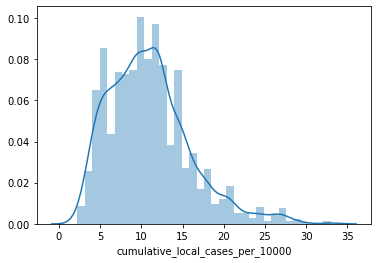

In [133]:
sns.distplot(ukdat.loc[ukdat.cumulative_local_cases_per_10000.notnull()].cumulative_local_cases_per_10000, )

# Save out datasets

In [134]:
ukdat = ukdat.drop(ukdat.columns[ukdat.columns.str.contains('tomwhite')], axis=1)

In [135]:
ukdat.columns[~ukdat.columns.isin(merged_df)]

Index(['fixed_county', 'area_code', 'cumulative_local_cases', 'fixed_country',
       'case_source', 'region_code', 'fixed_region',
       'cumulative_regional_cases', 'new_regional_cases', 'region_population',
       'cumulative_local_cases_per_10000',
       'cumulative_regional_cases_per_10000', 'new_regional_cases_per_10000'],
      dtype='object')

In [136]:
# Using USAFacts data instead of Johns Hopkins as default
jhu_cols = sorted(merged_df.columns[(merged_df.columns.str.contains('case') | merged_df.columns.str.contains('death')) & ~merged_df.columns.str.contains('_usf')])
usf_cols = sorted(merged_df.columns[(merged_df.columns.str.contains('case') | merged_df.columns.str.contains('death')) & merged_df.columns.str.contains('_usf')])

rn_dict = {jc:jc + '_jhu' for jc in jhu_cols}
rn_dict.update({uc:uc[:-4]  for uc in usf_cols})
merged_df = merged_df.rename(columns=rn_dict)

In [137]:
ukdat = ukdat.rename(columns={'cumulative_local_cases':'total_local_cases',
                              'cumulative_regional_cases': 'total_stateetc_cases',
                              'region_population': 'population_stateetc',
                              'cumulative_local_cases_per_10000': 'total_local_cases_per_10000',
                              'cumulative_regional_cases_per_10000': 'total_stateetc_cases_per_10000',
                              'new_regional_cases_per_10000': 'new_stateetc_cases_per_10000',
                              'new_regional_cases': 'new_stateetc_cases',
                              'region_code': 'stateetc_code'})

In [138]:
merged_df = merged_df.rename(columns={'FIPS':'area_code',
                                      'stateFIPS': 'stateetc_code'})

In [139]:
us_hold_out = merged_df.loc[merged_df.participant_id.isin(heldout_ids) & ~merged_df.participant_id.isin(rt_dat), :]
us_working = merged_df.loc[~merged_df.participant_id.isin(heldout_ids) | merged_df.participant_id.isin(rt_dat), :]
uk_hold_out = ukdat.loc[ukdat.participant_id.isin(heldout_ids) & ~ukdat.participant_id.isin(rt_dat), :]
uk_working = ukdat.loc[~ukdat.participant_id.isin(heldout_ids) | ukdat.participant_id.isin(rt_dat), :]
hold_out = pd.concat([us_hold_out, uk_hold_out], sort=False, )
working = pd.concat([us_working, uk_working], sort=False)
# Make sure everything's got the correct lengths
assert hold_out.loc[~hold_out.exclude, :].participant_id.nunique() + working.loc[~working.exclude, :].participant_id.nunique() == dat.loc[~dat.exclude,:].participant_id.nunique() 
assert (len(hold_out) + len(working)) == len(dat)

In [140]:
# make sure hold-out split is preserved
assert xp_dat.participant_id.isin(hold_out.participant_id).sum() == 0
old_working = pd.read_csv(data_dir / 'working_data_20200424.csv')
assert working.participant_id.isin(old_working.participant_id).all()
assert old_working.participant_id.isin(working.participant_id).all()
old_hold_out = pd.read_csv(data_dir / 'hold_out_data_20200424.csv')
assert hold_out.participant_id.isin(old_hold_out.participant_id).all()
assert old_hold_out.participant_id.isin(hold_out.participant_id).all()

/Users/nielsond/code/CRISIS_project/bright_boffin/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (39,238,260,288,289,290,291) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [141]:
working.loc[~working.exclude & ~working['sample'].isin(rt_samples)].groupby(['form', 'sample_country'])[['participant_id']].count()

participant_id
form   sample_country                
adult  UK                         930
       US                         902
parent UK                         868
       US                         662

In [142]:
working.loc[~working.exclude_with_RT].groupby(['form', 'sample_country'])[['participant_id']].nunique().rename(columns={'participant_id': 'n_participants'})

n_participants
form   sample_country                
adult  UK                        1037
       US                        1017
parent UK                         969
       US                         770

In [143]:
us_hold_out.to_csv(data_dir / 'us_hold_out_data_20200504.csv', index=None)
us_working.to_csv(data_dir / 'us_working_data_20200504.csv', index=None)
uk_hold_out.to_csv(data_dir / 'uk_hold_out_data_20200504.csv', index=None)
uk_working.to_csv(data_dir / 'uk_working_data_20200504.csv', index=None)
hold_out.to_csv(data_dir / 'hold_out_data_20200504.csv', index=None)
working.to_csv(data_dir / 'working_data_20200504.csv', index=None)